### Molecular Dynamics PCA  Analysis

#### **Principal Component Analysis in MD Simulations**

This Jupyter Notebook provides a comprehensive **PCA (Principal Component Analysis)** workflow for MD trajectories.

### **Overview:**
- **PCA:** Extracts dominant collective motions from MD simulations.
- **Clustering:** Groups conformations based on projections in low-dimensional space.

### **Dependencies:**
- MDTraj, PyEmma
- Scikit-learn (for PCA, clustering)
- NumPy, Pandas, Matplotlib, Seaborn

### **Usage:**
1. Load an MD trajectory and its topology.
2. Compute PCA and project frames onto principal components.
4. Cluster structures in PCA space.
5. Visualize the principal motions and clusters.


In [1]:
# Import Libraries
import numpy as np
from itertools import combinations
import os
import mdtraj as md
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.ndimage import gaussian_filter
import pandas as pd
import pytraj as pt
import glob
import pickle

# PyEmma
import pyemma
import pyemma.msm as msm
import pyemma.plots
import pyemma.coordinates as coor
import gc

# 1 - Discretization

start by defining the input files names and the input coordinates

In [2]:
directory= '/Volumes/Nia_HardDrive/HGs/TRAJS/'

trajfiles_HG3K50Q_apo=[fi for fi in glob.glob(directory + 'HG3K50Q_APO/'+ '*super.dcd')]
topfile_HG3K50Q_apo= directory + 'TOPS/HG3K50Q_apo.pdb'

trajfiles_HG3_Shell_apo=[fi for fi in glob.glob(directory +'HG317shell_APO/'+  '*super.dcd')]
topfile_HG3_Shell_apo= directory+'/TOPS/hg317_shell_apo.pdb'

trajfiles_HG3_Core_apo=[fi for fi in glob.glob(directory + 'HG4_APO/'+ '*super.dcd')]
topfile_HG3_Core_apo=directory+'/TOPS/hg4_apo.pdb'

trajfiles_HG3_Evolved_apo=[fi for fi in glob.glob(directory + 'HG317_APO/'+ '*super.dcd')]
topfile_HG3_Evolved_apo=directory+'/TOPS/hg317_apo.pdb'




In [3]:
trajfiles = []
trajfiles.append(trajfiles_HG3K50Q_apo)
trajfiles.append(trajfiles_HG3_Shell_apo)
trajfiles.append(trajfiles_HG3_Core_apo)
trajfiles.append(trajfiles_HG3_Evolved_apo)


topfiles = []
topfiles.append(topfile_HG3K50Q_apo)
topfiles.append(topfile_HG3_Shell_apo)
topfiles.append(topfile_HG3_Core_apo)
topfiles.append(topfile_HG3_Evolved_apo)


In [4]:
topology_hg3k50q=md.load(topfiles[0]).top
topology_hg3_shell=md.load(topfiles[1]).top
topology_hg3_core=md.load(topfiles[2]).top
topology_hg3_evolved=md.load(topfiles[3]).top


In [5]:
trajfiles

[['/Volumes/Nia_HardDrive/HGs/TRAJS/HG3K50Q_APO/noTSA2_super.dcd',
  '/Volumes/Nia_HardDrive/HGs/TRAJS/HG3K50Q_APO/noTSA3_super.dcd',
  '/Volumes/Nia_HardDrive/HGs/TRAJS/HG3K50Q_APO/noTSA_super.dcd'],
 ['/Volumes/Nia_HardDrive/HGs/TRAJS/HG317shell_APO/dyn_hg317shell_apo_rep1_super.dcd',
  '/Volumes/Nia_HardDrive/HGs/TRAJS/HG317shell_APO/dyn_hg317shell_apo_rep2_super.dcd',
  '/Volumes/Nia_HardDrive/HGs/TRAJS/HG317shell_APO/dyn_hg317shell_apo_rep3_super.dcd'],
 ['/Volumes/Nia_HardDrive/HGs/TRAJS/HG4_APO/dyn_hg4_apo_rep1_super.dcd',
  '/Volumes/Nia_HardDrive/HGs/TRAJS/HG4_APO/dyn_hg4_apo_rep2_super.dcd',
  '/Volumes/Nia_HardDrive/HGs/TRAJS/HG4_APO/dyn_hg4_apo_rep3_super.dcd'],
 ['/Volumes/Nia_HardDrive/HGs/TRAJS/HG317_APO/dyn_hg317_apo_rep1_super.dcd',
  '/Volumes/Nia_HardDrive/HGs/TRAJS/HG317_APO/dyn_hg317_apo_rep2_super.dcd',
  '/Volumes/Nia_HardDrive/HGs/TRAJS/HG317_APO/dyn_hg317_apo_rep3_super.dcd']]

## Analysis:

### 📂 **Data Organization Overview**  

In this analysis, we structure the data into two key components:  

#### 🟢 **FEATS (Features List)**  
- This contains the descriptors extracted from the **topology file** of the MD simulations.  
- Each feature represents a specific structural metric across all systems.  


#### 🔵 SOURCES (Data Arrays)
- These arrays store the computed values of each feature across all MD frames.
- Each source corresponds to a time-series representation of a feature throughout the trajectory.

# Featurization

In [32]:
### HG3K50Q_apo
feat0=pyemma.coordinates.featurizer(topfiles[0])
heavy_hg3k50q_bb=feat0.select('resid 0 to 298 and backbone')
feat0.add_selection(heavy_hg3k50q_bb)

#### HG3_shell_apo

feat1=pyemma.coordinates.featurizer(topfiles[1])
heavy_hg3_shell_bb=feat1.select('resid 0 to 298 and backbone')
feat1.add_selection(heavy_hg3_shell_bb)

# ### HG3_core_apo

feat2=pyemma.coordinates.featurizer(topfiles[2])
heavy_hg3_core_bb=feat2.select('resid 0 to 298 and backbone')
feat2.add_selection(heavy_hg3_core_bb)

#### HG3_Evolved_apo

feat3=pyemma.coordinates.featurizer(topfiles[3])
heavy_hg3_evolved_bb=feat3.select('resid 0 to 298 and backbone')
feat3.add_selection(heavy_hg3_evolved_bb)




In [33]:
print(feat0.describe()[0])
print(feat1.describe()[0])
print(feat2.describe()[0])
print(feat3.describe()[0])

print(feat0.describe()[-1])
print(feat1.describe()[-1])
print(feat2.describe()[-1])
print(feat3.describe()[-1])


ATOM:GLN 1 N 0 x
ATOM:GLN 1 N 0 x
ATOM:GLN 1 N 0 x
ATOM:GLN 1 N 0 x
ATOM:GLN 299 O 4522 z
ATOM:GLN 299 O 4541 z
ATOM:GLN 299 O 4505 z
ATOM:GLN 299 O 4524 z


In [34]:
print(len(feat0.describe()))
print(len(feat1.describe()))
print(len(feat2.describe()))
print(len(feat3.describe()))


3588
3588
3588
3588


In [35]:
feats=[]
feats.append(feat0)
feats.append(feat1)
feats.append(feat2)
feats.append(feat3)


# PCA

In [36]:
gc.collect()
sources=[]
print (len(feats[0].describe()))
for traj in range(0,len(topfiles)):
    print (traj,len(trajfiles))
    sources.append(pyemma.coordinates.load(trajfiles[traj],features=feats[traj]))

3588
0 4


Obtaining file info:   0%|                                                                        | 0/3 [00:00…

getting output of FeatureReader:   0%|                                                           | 0/18 [00:00…

1 4


Obtaining file info:   0%|                                                                        | 0/3 [00:00…

getting output of FeatureReader:   0%|                                                           | 0/18 [00:00…

2 4


Obtaining file info:   0%|                                                                        | 0/3 [00:00…

getting output of FeatureReader:   0%|                                                           | 0/18 [00:00…

3 4


Obtaining file info:   0%|                                                                        | 0/3 [00:00…

getting output of FeatureReader:   0%|                                                           | 0/18 [00:00…

In [37]:
joint_data = sources[0] + sources[1] + sources[2] + sources[3]

In [38]:
gc.collect()
pca_joint=pyemma.coordinates.pca(data=joint_data,kinetic_map=False)
pca_Y = pca_joint.get_output()
pca_HG3K50Q_apo,pca_HG3_S_apo, pca_HG3_C_apo,pca_HG3_E_apo = np.split(pca_Y, np.cumsum(list(map(len, trajfiles)))[:-1])

/Users/Nia/opt/anaconda3/envs/py38/lib/python3.8/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "pca". Called from /Users/Nia/opt/anaconda3/envs/py38/lib/python3.8/site-packages/decorator.py line 232. Use sklearn.decomposition.PCA instead.
  return caller(func, *(extras + args), **kw)


calc mean+cov:   0%|                                                                             | 0/72 [00:00…

getting output of PCA:   0%|                                                                     | 0/72 [00:00…

/Users/Nia/opt/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


In [41]:
dist_PCA_correl = pca_joint.feature_PC_correlation

n_argmax = 2
for ii, icorr in enumerate(dist_PCA_correl.T):
    if ii > 10:
        break
    print("For PCA %u"%ii)
    argmaxs = [ii for ii in np.abs(icorr).argsort()[::-1] if not np.isnan(icorr[ii])]
    for art in argmaxs[:10]:
        print(str(art)+' %s %3.2f'%(feats[0].describe()[art], icorr[art]))
    print()

For PCA 0
660 ATOM:GLY 56 N 845 x -0.94
663 ATOM:GLY 56 CA 847 x -0.94
666 ATOM:GLY 56 C 850 x -0.93
654 ATOM:GLN 55 C 843 x -0.93
669 ATOM:GLY 56 O 851 x -0.92
622 ATOM:GLU 52 O 802 y 0.92
679 ATOM:ASN 57 C 864 y 0.92
672 ATOM:ASN 57 N 852 x -0.92
682 ATOM:ASN 57 O 865 y 0.92
657 ATOM:GLN 55 O 844 x -0.91

For PCA 1
1609 ATOM:SER 135 N 2069 y 0.81
1694 ATOM:LEU 142 N 2190 z -0.81
1676 ATOM:VAL 140 C 2168 z -0.81
1673 ATOM:VAL 140 CA 2156 z -0.81
1603 ATOM:GLY 134 C 2067 y 0.81
1682 ATOM:PHE 141 N 2170 z -0.81
1591 ATOM:ASP 133 C 2060 y 0.81
1552 ATOM:PHE 130 CA 2003 y 0.80
1597 ATOM:GLY 134 N 2062 y 0.80
1688 ATOM:PHE 141 C 2188 z -0.80

For PCA 2
1203 ATOM:LEU 101 CA 1523 x -0.73
1200 ATOM:LEU 101 N 1521 x -0.72
1179 ATOM:ASN 99 CA 1495 x -0.72
1176 ATOM:ASN 99 N 1493 x -0.71
1158 ATOM:ASP 97 C 1469 x -0.71
1182 ATOM:ASN 99 C 1505 x -0.70
1188 ATOM:THR 100 N 1507 x -0.70
1170 ATOM:LYS 98 C 1491 x -0.69
1206 ATOM:LEU 101 C 1538 x -0.69
1164 ATOM:LYS 98 N 1471 x -0.69

For PCA 3
2861 A

In [36]:
# Save PCA files
pca_files_directory = "/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Files/"
pickle.dump(pca_Y, open (pca_files_directory + "pca_apo.p", "wb"))
pickle.dump(pca_HG3K50Q_apo, open (pca_files_directory + "pca_D_apo.p", "wb"))
pickle.dump(pca_HG3_S_apo, open (pca_files_directory + "pca_S_apo.p", "wb"))
pickle.dump(pca_HG3_C_apo, open (pca_files_directory + "pca_C_apo.p", "wb"))
pickle.dump(pca_HG3_E_apo, open (pca_files_directory + "pca_E_apo.p", "wb"))

In [37]:
del joint_data
del sources
import gc
gc.collect()

53

(<Figure size 640x440 with 2 Axes>, <Axes: >)

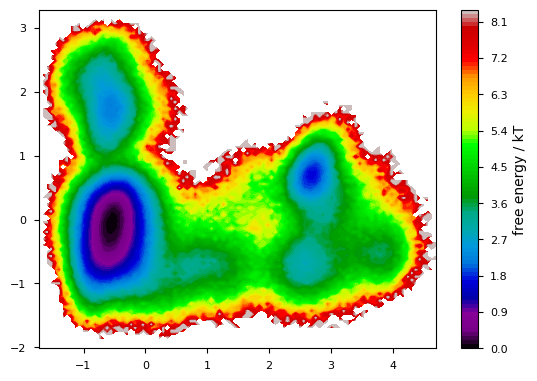

In [38]:
all_data=np.vstack(pca_Y)
pyemma.plots.plot_free_energy(all_data[:,0], all_data[:,1])



### Saving PCA contributions

In [39]:
def plot_Nice_PES(P_test,P_test2,bins=100,sigma=3, title=False, size = 1):


    mpl.style.use("seaborn-paper")
    plt.figure(figsize=(10*size,10*size))
    alldata=np.vstack(P_test)
    min1=np.min(alldata[:,0])
    max1=np.max(alldata[:,0])
    min2=np.min(alldata[:,1])
    max2=np.max(alldata[:,1])
    
    tickspacing1=2.0
    tickspacing2=2.0
    z,x,y = np.histogram2d(alldata[:,0], alldata[:,1], bins=bins)
    z += 0.1
    
    # compute free energies
    F = -np.log(z)
    
    
    # contour plot
    extent = [x[0], x[-1], y[0], y[-1]]
    
    plt.xticks(np.arange(int(min1), int(max1)+1, tickspacing1),fontsize=30*size)
    plt.yticks(np.arange(int(min2), int(max2)+1, tickspacing2),fontsize=30*size)
    #    sigma = 0.99 # this depends on how noisy your data is, play with it!
    data = gaussian_filter((F.T)*0.592-np.min(F.T)*0.592, sigma)
    levels=np.linspace(0,np.max(data)-0.5,num=10)
    plt.contour(data,colors='black',linestyles='solid',alpha=0.5,cmap=None, cbar=True,levels=levels,extent=extent)
    plt.contourf(data,alpha=0.3,cmap='gray', cbar=True,levels=levels,extent=extent)
    
    
    alldata2=np.vstack(P_test2)
    min12=np.min(alldata2[:,0])
    max12=np.max(alldata2[:,0])
    min22=np.min(alldata2[:,1])
    max22=np.max(alldata2[:,1])
    
    tickspacing12=1.0
    tickspacing22=1.0
    z2,x2,y2 = np.histogram2d(alldata2[:,0], alldata2[:,1], bins=bins)
    z2 += 0.1
    
    # compute free energies
    F2 = -np.log(z2)
    
    
    # contour plot
    extent2 = [x2[0], x2[-1], y2[0], y2[-1]]
    
    #plt.xticks(np.arange(int(min12), int(max12)+1, tickspacing12),fontsize=10*size)
    #plt.yticks(np.arange(int(min22), int(max22)+1, tickspacing22),fontsize=10*size)
    sigma = sigma # this depends on how noisy your data is, play with it!
    data2 = gaussian_filter((F2.T)*0.592-np.min(F2.T)*0.592, sigma)
    levels2=np.linspace(0,np.max(data2)-0.5,num=10)
    plt.contour(data2,colors='black',linestyles='solid',alpha=0.7,cmap=None, cbar=True, levels=levels2,extent=extent2)
    plt.contourf(data2,alpha=0.7,cmap='jet', cbar=True,levels=levels2,extent=extent2)
    
    
#     plt.subplots_adjust(bottom=0.1, right=0.8, top=0.8)
#     cax = plt.axes([0.85, 0.1, 0.05, 0.7])

#     cbar = plt.colorbar(cax=cax, aspect=500)
#     cbar.set_ticks([])



/var/folders/zn/8s7hvchn4y7c8m4jgy8_qz800000gn/T/ipykernel_97669/1326009326.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use("seaborn-paper")
/var/folders/zn/8s7hvchn4y7c8m4jgy8_qz800000gn/T/ipykernel_97669/1326009326.py:29: UserWarning: The following kwargs were not used by contour: 'cbar'
  plt.contour(data,colors='black',linestyles='solid',alpha=0.5,cmap=None, cbar=True,levels=levels,extent=extent)
/var/folders/zn/8s7hvchn4y7c8m4jgy8_qz800000gn/T/ipykernel_97669/1326009326.py:30: UserWarning: The following kwargs were not used by contour: 'cbar'
  plt.contourf(data,alpha=0.3,cmap='gray', cbar=True,levels=levels,extent=extent)
/var/folders/zn/8s7hvchn4y7c8m4jgy8_qz800000gn/T/ipykernel_97669/1326009326.py:56: UserWarning: The following kwar

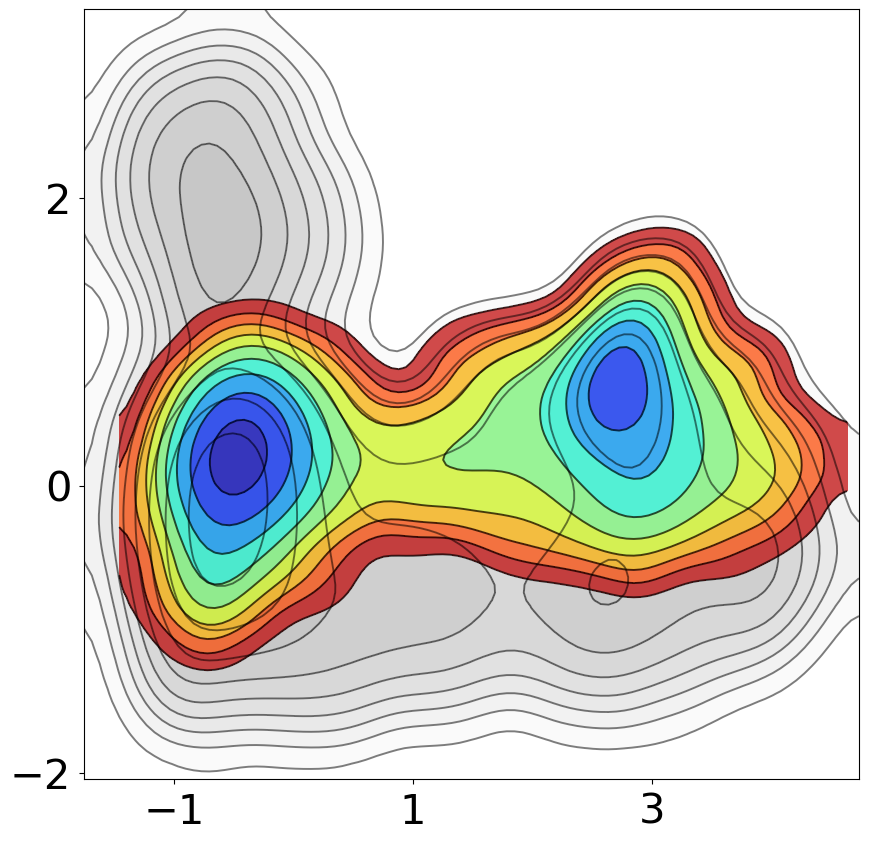

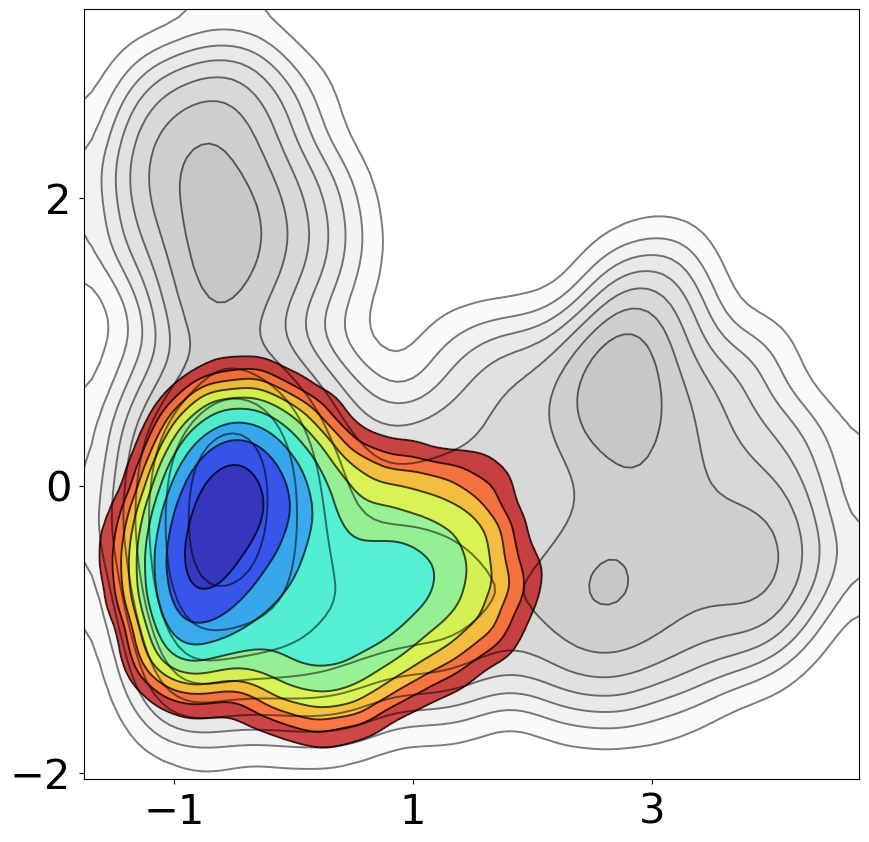

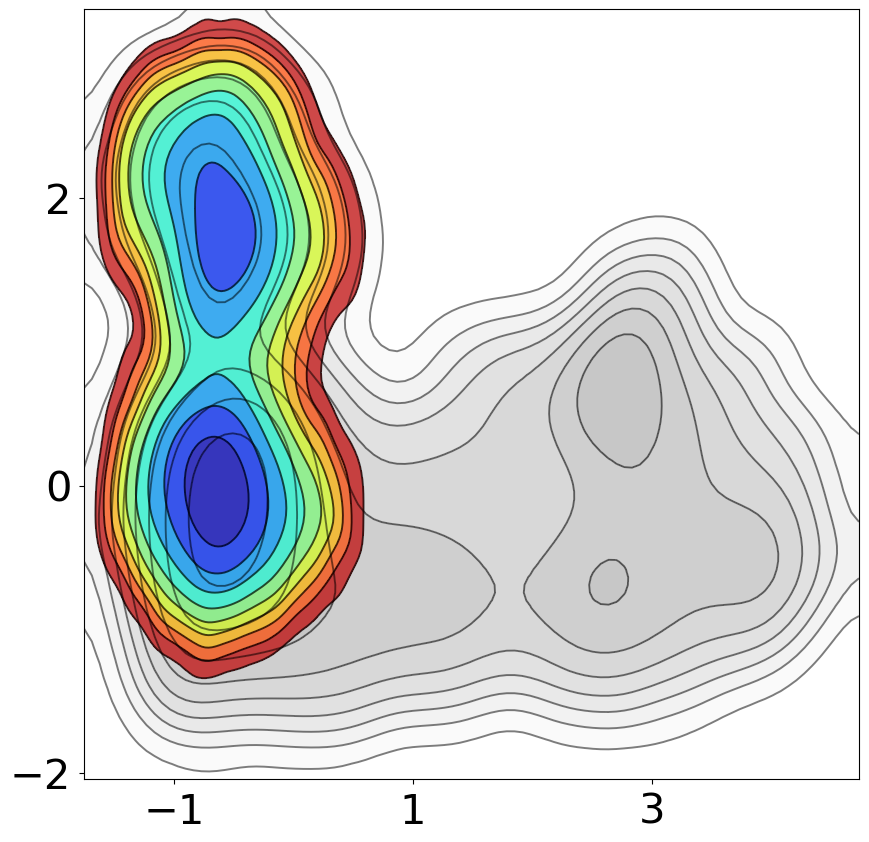

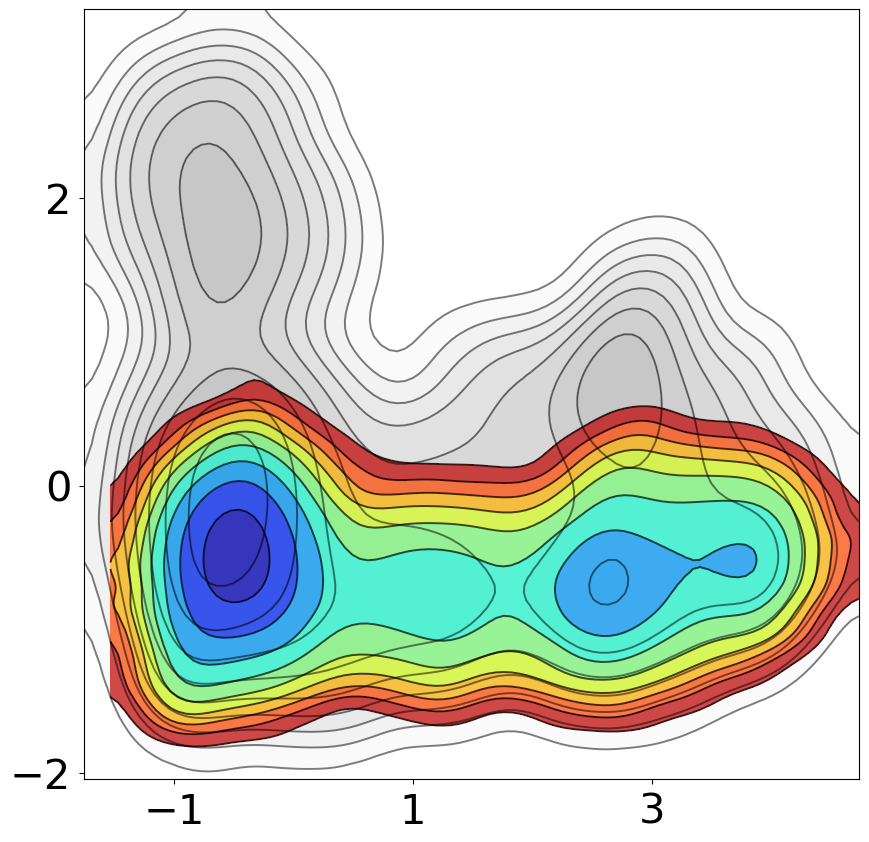

In [42]:
plot_Nice_PES(pca_Y,pca_HG3K50Q_apo)
plot_Nice_PES(pca_Y,pca_HG3_S_apo)
plot_Nice_PES(pca_Y,pca_HG3_C_apo)
plot_Nice_PES(pca_Y,pca_HG3_E_apo)


### Loading PCAs

In [6]:
pca_Y = pickle.load(open("/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Files/pca_apo.p","rb"))
pca_HG3K50Q_apo = pickle.load(open("/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Files/pca_D_apo.p","rb"))
pca_HG3_S_apo = pickle.load(open("/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Files/pca_S_apo.p","rb"))
pca_HG3_C_apo = pickle.load(open("/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Files/pca_C_apo.p","rb"))
pca_HG3_E_apo = pickle.load(open("/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Files/pca_E_apo.p","rb"))


# Clustering


/Users/Nia/opt/anaconda3/envs/py38/lib/python3.8/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/Nia/opt/anaconda3/envs/py38/lib/python3.8/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)


kmeans iterations:   0%|                                                                        | 0/500 [00:00…

getting output of KmeansClustering:   0%|                                                         | 0/3 [00:00…

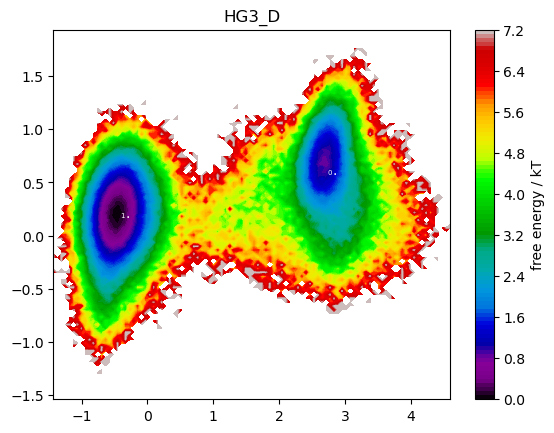

In [8]:
n_clusters=2

cl_HG3_D = coor.cluster_kmeans(data=[t[:, :12] for t in pca_HG3K50Q_apo], k=n_clusters, stride=1,max_iter=500)
# for later use we save the discrete trajectories and cluster center coordinates:
dtrajs_HG3_D = cl_HG3_D.dtrajs
cc_x_HG3_D = cl_HG3_D.clustercenters[:,0]

cc_y_HG3_D = cl_HG3_D.clustercenters[:,1]

all_data = np.vstack(pca_HG3K50Q_apo)
pyemma.plots.plot_free_energy(all_data[:,0], all_data[:,1])
plt.title('HG3_D')
for i in range(n_clusters):
    plt.text( cc_x_HG3_D[i]+0.08,cc_y_HG3_D[i],'.', color='white', size=10)
    plt.annotate("%i"%i, xy=(cc_x_HG3_D[i],cc_y_HG3_D[i]), size=5, color='white')
#plt.axis(extend)
plt.show()

In [9]:
index_cluster=cl_HG3_D.index_clusters[0]

traj = coor.source(trajfiles[0], top=topfiles[0])
name = '/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/HG3_D_apo_cluster_0.dcd'
coor.save_traj(traj,index_cluster, outfile=name)


Obtaining file info:   0%|                                                                        | 0/3 [00:00…

17-07-24 17:55:25 pyemma.coordinates.api INFO     Created file /Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/HG3_D_apo_cluster_0.dcd


In [10]:
index_cluster=cl_HG3_D.index_clusters[1]

traj = coor.source(trajfiles[0], top=topfiles[0])
name = '/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/HG3_D_apo_cluster_1.dcd'
coor.save_traj(traj,index_cluster, outfile=name)


Obtaining file info:   0%|                                                                        | 0/3 [00:00…

17-07-24 18:08:34 pyemma.coordinates.api INFO     Created file /Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/HG3_D_apo_cluster_1.dcd


/Users/Nia/opt/anaconda3/envs/py38/lib/python3.8/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/Nia/opt/anaconda3/envs/py38/lib/python3.8/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)


initialize kmeans++ centers:   0%|                                                                | 0/3 [00:00…

kmeans iterations:   0%|                                                                        | 0/500 [00:00…

getting output of KmeansClustering:   0%|                                                         | 0/3 [00:00…

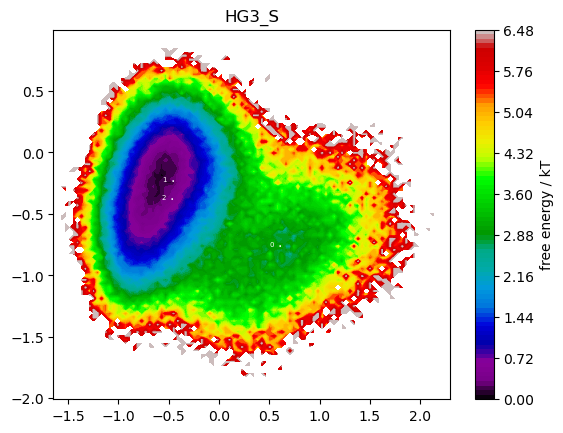

In [23]:
n_clusters=3

cl_HG3_S = coor.cluster_kmeans(data=[t[:, :12] for t in pca_HG3_S_apo], k=n_clusters, stride=1,max_iter=500)
# for later use we save the discrete trajectories and cluster center coordinates:
dtrajs_HG3_S = cl_HG3_S.dtrajs
cc_x_HG3_S = cl_HG3_S.clustercenters[:,0]

cc_y_HG3_S = cl_HG3_S.clustercenters[:,1]

all_data = np.vstack(pca_HG3_S_apo)
pyemma.plots.plot_free_energy(all_data[:,0], all_data[:,1])
plt.title('HG3_S')
for i in range(n_clusters):
    plt.text( cc_x_HG3_S[i]+0.08,cc_y_HG3_S[i],'.', color='white', size=10)
    plt.annotate("%i"%i, xy=(cc_x_HG3_S[i],cc_y_HG3_S[i]), size=5, color='white')
#plt.axis(extend)
plt.show()

In [24]:
index_cluster=cl_HG3_S.index_clusters[0]

traj = coor.source(trajfiles[1], top=topfiles[1])
name = '/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/HG3_S_apo_cluster_0.dcd'
coor.save_traj(traj,index_cluster, outfile=name)


Obtaining file info:   0%|                                                                        | 0/3 [00:00…

17-07-24 18:28:35 pyemma.coordinates.api INFO     Created file /Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/HG3_S_apo_cluster_0.dcd


In [25]:
index_cluster=cl_HG3_S.index_clusters[1]

traj = coor.source(trajfiles[1], top=topfiles[1])
name = '/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/HG3_S_apo_cluster_1.dcd'
coor.save_traj(traj,index_cluster, outfile=name)


Obtaining file info:   0%|                                                                        | 0/3 [00:00…

17-07-24 18:39:21 pyemma.coordinates.api INFO     Created file /Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/HG3_S_apo_cluster_1.dcd


In [26]:
index_cluster=cl_HG3_S.index_clusters[2]

traj = coor.source(trajfiles[1], top=topfiles[1])
name = '/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/HG3_S_apo_cluster_2.dcd'
coor.save_traj(traj,index_cluster, outfile=name)


Obtaining file info:   0%|                                                                        | 0/3 [00:00…

17-07-24 18:47:24 pyemma.coordinates.api INFO     Created file /Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/HG3_S_apo_cluster_2.dcd


/Users/Nia/opt/anaconda3/envs/py38/lib/python3.8/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/Nia/opt/anaconda3/envs/py38/lib/python3.8/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)


kmeans iterations:   0%|                                                                        | 0/500 [00:00…

getting output of KmeansClustering:   0%|                                                         | 0/3 [00:00…

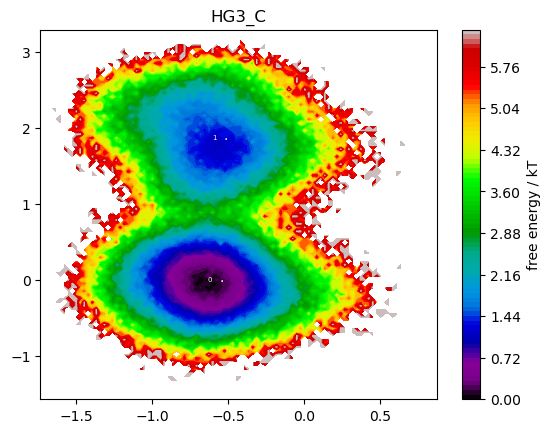

In [27]:
n_clusters=2

cl_HG3_C = coor.cluster_kmeans(data=[t[:, :12] for t in pca_HG3_C_apo], k=n_clusters, stride=1,max_iter=500)
# for later use we save the discrete trajectories and cluster center coordinates:
dtrajs_HG3_C = cl_HG3_C.dtrajs
cc_x_HG3_C = cl_HG3_C.clustercenters[:,0]

cc_y_HG3_C = cl_HG3_C.clustercenters[:,1]

all_data = np.vstack(pca_HG3_C_apo)
pyemma.plots.plot_free_energy(all_data[:,0], all_data[:,1])
plt.title('HG3_C')
for i in range(n_clusters):
    plt.text( cc_x_HG3_C[i]+0.08,cc_y_HG3_C[i],'.', color='white', size=10)
    plt.annotate("%i"%i, xy=(cc_x_HG3_C[i],cc_y_HG3_C[i]), size=5, color='white')
#plt.axis(extend)
plt.show()

In [29]:
index_cluster=cl_HG3_C.index_clusters[0]

traj = coor.source(trajfiles[2], top=topfiles[2])
name = '/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/HG3_C_apo_cluster_0.dcd'
coor.save_traj(traj,index_cluster, outfile=name)


Obtaining file info:   0%|                                                                        | 0/3 [00:00…

17-07-24 18:59:47 pyemma.coordinates.api INFO     Created file /Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/HG3_C_apo_cluster_0.dcd


In [30]:
index_cluster=cl_HG3_C.index_clusters[1]

traj = coor.source(trajfiles[2], top=topfiles[2])
name = '/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/HG3_C_apo_cluster_1.dcd'
coor.save_traj(traj,index_cluster, outfile=name)


Obtaining file info:   0%|                                                                        | 0/3 [00:00…

17-07-24 19:04:08 pyemma.coordinates.api INFO     Created file /Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/HG3_C_apo_cluster_1.dcd


/Users/Nia/opt/anaconda3/envs/py38/lib/python3.8/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/Nia/opt/anaconda3/envs/py38/lib/python3.8/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)


kmeans iterations:   0%|                                                                        | 0/500 [00:00…

getting output of KmeansClustering:   0%|                                                         | 0/3 [00:00…

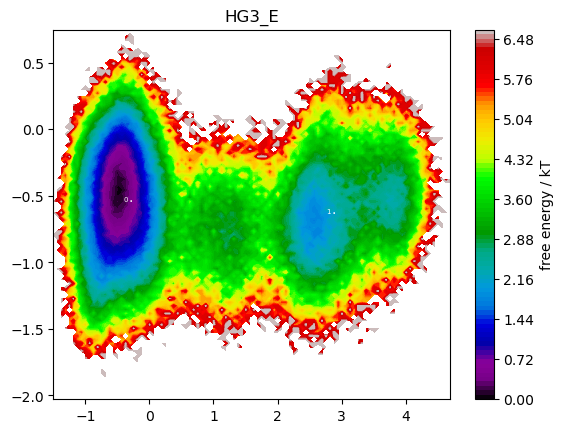

In [31]:
n_clusters=2

cl_HG3_E = coor.cluster_kmeans(data=[t[:, :12] for t in pca_HG3_E_apo], k=n_clusters, stride=1,max_iter=500)
# for later use we save the discrete trajectories and cluster center coordinates:
dtrajs_HG3_E = cl_HG3_E.dtrajs
cc_x_HG3_E = cl_HG3_E.clustercenters[:,0]

cc_y_HG3_E = cl_HG3_E.clustercenters[:,1]

all_data = np.vstack(pca_HG3_E_apo)
pyemma.plots.plot_free_energy(all_data[:,0], all_data[:,1])
plt.title('HG3_E')
for i in range(n_clusters):
    plt.text( cc_x_HG3_E[i]+0.08,cc_y_HG3_E[i],'.', color='white', size=10)
    plt.annotate("%i"%i, xy=(cc_x_HG3_E[i],cc_y_HG3_E[i]), size=5, color='white')
#plt.axis(extend)
plt.show()

In [32]:
index_cluster=cl_HG3_E.index_clusters[0]

traj = coor.source(trajfiles[3], top=topfiles[3])
name = '/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/HG3_E_apo_cluster_0.dcd'
coor.save_traj(traj,index_cluster, outfile=name)


Obtaining file info:   0%|                                                                        | 0/3 [00:00…

17-07-24 19:17:54 pyemma.coordinates.api INFO     Created file /Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/HG3_E_apo_cluster_0.dcd


In [33]:
index_cluster=cl_HG3_E.index_clusters[1]

traj = coor.source(trajfiles[3], top=topfiles[3])
name = '/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/HG3_E_apo_cluster_1.dcd'
coor.save_traj(traj,index_cluster, outfile=name)


Obtaining file info:   0%|                                                                        | 0/3 [00:00…

17-07-24 19:20:44 pyemma.coordinates.api INFO     Created file /Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/HG3_E_apo_cluster_1.dcd


# Converting DCD to PDB

In [35]:
#HG3 D Cluster 0
name = '/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/HG3_D_apo_cluster_0.dcd'
direc = '/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/PDBs_APO/'

traj = md.load(name,top=topfiles[0],stride=100)
traj.save(direc + 'HG3_D_cluster_0.pdb')

atom_indices = [a.index for a in traj.topology.atoms if a.element.symbol != 'H']
distances = np.empty((traj.n_frames, traj.n_frames))
for i in range(traj.n_frames):
    distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices)
    
beta = 1
index = np.exp(-beta*distances / distances.std()).sum(axis=1).argmax()
print(index)

centroid = traj[index]
print(centroid)
centroid.save(direc + 'HG3_D_cluster_0_centroid.pdb')

746
<mdtraj.Trajectory with 1 frames, 4541 atoms, 300 residues, and unitcells>


In [36]:
#HG3 D Cluster 1
name = '/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/HG3_D_apo_cluster_1.dcd'
direc = '/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/PDBs_APO/'

traj = md.load(name,top=topfiles[0],stride=100)
traj.save(direc + 'HG3_D_cluster_1.pdb')

atom_indices = [a.index for a in traj.topology.atoms if a.element.symbol != 'H']
distances = np.empty((traj.n_frames, traj.n_frames))
for i in range(traj.n_frames):
    distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices)
    
beta = 1
index = np.exp(-beta*distances / distances.std()).sum(axis=1).argmax()
print(index)

centroid = traj[index]
print(centroid)
centroid.save(direc + 'HG3_D_cluster_1_centroid.pdb')

624
<mdtraj.Trajectory with 1 frames, 4541 atoms, 300 residues, and unitcells>


In [37]:
#HG3 S Cluster 0
name = '/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/HG3_S_apo_cluster_0.dcd'
direc = '/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/PDBs_APO/'

traj = md.load(name,top=topfiles[1],stride=100)
traj.save(direc + 'HG3_S_cluster_0.pdb')

atom_indices = [a.index for a in traj.topology.atoms if a.element.symbol != 'H']
distances = np.empty((traj.n_frames, traj.n_frames))
for i in range(traj.n_frames):
    distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices)
    
beta = 1
index = np.exp(-beta*distances / distances.std()).sum(axis=1).argmax()
print(index)

centroid = traj[index]
print(centroid)
centroid.save(direc + 'HG3_S_cluster_0_centroid.pdb')

215
<mdtraj.Trajectory with 1 frames, 4542 atoms, 299 residues, and unitcells>


In [38]:
#HG3 S Cluster 1
name = '/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/HG3_S_apo_cluster_1.dcd'
direc = '/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/PDBs_APO/'

traj = md.load(name,top=topfiles[1],stride=100)
traj.save(direc + 'HG3_S_cluster_1.pdb')

atom_indices = [a.index for a in traj.topology.atoms if a.element.symbol != 'H']
distances = np.empty((traj.n_frames, traj.n_frames))
for i in range(traj.n_frames):
    distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices)
    
beta = 1
index = np.exp(-beta*distances / distances.std()).sum(axis=1).argmax()
print(index)

centroid = traj[index]
print(centroid)
centroid.save(direc + 'HG3_S_cluster_1_centroid.pdb')

1148
<mdtraj.Trajectory with 1 frames, 4542 atoms, 299 residues, and unitcells>


In [39]:
#HG3 S Cluster 2
name = '/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/HG3_S_apo_cluster_2.dcd'
direc = '/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/PDBs_APO/'

traj = md.load(name,top=topfiles[1],stride=100)
traj.save(direc + 'HG3_S_cluster_2.pdb')

atom_indices = [a.index for a in traj.topology.atoms if a.element.symbol != 'H']
distances = np.empty((traj.n_frames, traj.n_frames))
for i in range(traj.n_frames):
    distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices)
    
beta = 1
index = np.exp(-beta*distances / distances.std()).sum(axis=1).argmax()
print(index)

centroid = traj[index]
print(centroid)
centroid.save(direc + 'HG3_S_cluster_2_centroid.pdb')

1091
<mdtraj.Trajectory with 1 frames, 4542 atoms, 299 residues, and unitcells>


In [40]:
#HG3 C Cluster 0
name = '/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/HG3_C_apo_cluster_0.dcd'
direc = '/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/PDBs_APO/'

traj = md.load(name,top=topfiles[2],stride=100)
traj.save(direc + 'HG3_C_cluster_0.pdb')

atom_indices = [a.index for a in traj.topology.atoms if a.element.symbol != 'H']
distances = np.empty((traj.n_frames, traj.n_frames))
for i in range(traj.n_frames):
    distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices)
    
beta = 1
index = np.exp(-beta*distances / distances.std()).sum(axis=1).argmax()
print(index)

centroid = traj[index]
print(centroid)
centroid.save(direc + 'HG3_C_cluster_0_centroid.pdb')

416
<mdtraj.Trajectory with 1 frames, 4506 atoms, 299 residues, and unitcells>


In [41]:
#HG3 C Cluster 1
name = '/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/HG3_C_apo_cluster_1.dcd'
direc = '/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/PDBs_APO/'

traj = md.load(name,top=topfiles[2],stride=100)
traj.save(direc + 'HG3_C_cluster_1.pdb')

atom_indices = [a.index for a in traj.topology.atoms if a.element.symbol != 'H']
distances = np.empty((traj.n_frames, traj.n_frames))
for i in range(traj.n_frames):
    distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices)
    
beta = 1
index = np.exp(-beta*distances / distances.std()).sum(axis=1).argmax()
print(index)

centroid = traj[index]
print(centroid)
centroid.save(direc + 'HG3_C_cluster_1_centroid.pdb')

280
<mdtraj.Trajectory with 1 frames, 4506 atoms, 299 residues, and unitcells>


In [42]:
#HG3 E Cluster 0
name = '/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/HG3_E_apo_cluster_0.dcd'
direc = '/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/PDBs_APO/'

traj = md.load(name,top=topfiles[3],stride=100)
traj.save(direc + 'HG3_E_cluster_0.pdb')

atom_indices = [a.index for a in traj.topology.atoms if a.element.symbol != 'H']
distances = np.empty((traj.n_frames, traj.n_frames))
for i in range(traj.n_frames):
    distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices)
    
beta = 1
index = np.exp(-beta*distances / distances.std()).sum(axis=1).argmax()
print(index)

centroid = traj[index]
print(centroid)
centroid.save(direc + 'HG3_E_cluster_0_centroid.pdb')

1717
<mdtraj.Trajectory with 1 frames, 4526 atoms, 299 residues, and unitcells>


In [43]:
#HG3 E Cluster 1
name = '/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/HG3_E_apo_cluster_1.dcd'
direc = '/Volumes/Nia_HardDrive/HGs/Analysis_Clustering_noHG3/Clusters/PDBs_APO/'

traj = md.load(name,top=topfiles[3],stride=100)
traj.save(direc + 'HG3_E_cluster_1.pdb')

atom_indices = [a.index for a in traj.topology.atoms if a.element.symbol != 'H']
distances = np.empty((traj.n_frames, traj.n_frames))
for i in range(traj.n_frames):
    distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices)
    
beta = 1
index = np.exp(-beta*distances / distances.std()).sum(axis=1).argmax()
print(index)

centroid = traj[index]
print(centroid)
centroid.save(direc + 'HG3_E_cluster_1_centroid.pdb')

669
<mdtraj.Trajectory with 1 frames, 4526 atoms, 299 residues, and unitcells>


# Creating Figures

In [22]:
def plot_Nice_PES(P_test,P_test2,bins=150,sigma=10, title=False, size = 1):


    mpl.style.use("seaborn-paper")
    plt.figure(figsize=(10*size,10*size))
    alldata=np.vstack(P_test)
    min1=np.min(alldata[:,0])
    max1=np.max(alldata[:,0])
    min2=np.min(alldata[:,1])
    max2=np.max(alldata[:,1])
    
    tickspacing1=2.0
    tickspacing2=2.0
    z,x,y = np.histogram2d(alldata[:,0], alldata[:,1], bins=bins)
    z += 0.1
    
    # compute free energies
    F = -np.log(z)
    
    
    # contour plot
    extent = [x[0], x[-1], y[0], y[-1]]
    
    plt.xticks(np.arange(int(min1), int(max1)+1, tickspacing1),fontsize=50*size, fontname = 'Arial')
    plt.yticks(np.arange(int(min2), int(max2)+1, tickspacing2),fontsize=50*size)
    #    sigma = 0.99 # this depends on how noisy your data is, play with it!
    data = gaussian_filter((F.T)*0.592-np.min(F.T)*0.592, sigma)
    levels=np.linspace(0,np.max(data)-0.5,num=10)
    plt.contour(data,colors='black',linestyles='solid',alpha=0.5,cmap=None, cbar=True,levels=levels,extent=extent)
    plt.contourf(data,alpha=0.3,cmap='gray', cbar=True,levels=levels,extent=extent)
    
    
    alldata2=np.vstack(P_test2)
    min12=np.min(alldata2[:,0])
    max12=np.max(alldata2[:,0])
    min22=np.min(alldata2[:,1])
    max22=np.max(alldata2[:,1])
    
    tickspacing12=1.0
    tickspacing22=1.0
    z2,x2,y2 = np.histogram2d(alldata2[:,0], alldata2[:,1], bins=bins)
    z2 += 0.1
    
    # compute free energies
    F2 = -np.log(z2)
    
    
    # contour plot
    extent2 = [x2[0], x2[-1], y2[0], y2[-1]]
    
    #plt.xticks(np.arange(int(min12), int(max12)+1, tickspacing12),fontsize=10*size)
    #plt.yticks(np.arange(int(min22), int(max22)+1, tickspacing22),fontsize=10*size)
    sigma = sigma # this depends on how noisy your data is, play with it!
    data2 = gaussian_filter((F2.T)*0.592-np.min(F2.T)*0.592, sigma)
    levels2=np.linspace(0,np.max(data2)-0.5,num=10)
    plt.contour(data2,colors='black',linestyles='solid',alpha=0.7,cmap=None, cbar=True, levels=levels2,extent=extent2)
    plt.contourf(data2,alpha=0.7,cmap='jet', cbar=True,levels=levels2,extent=extent2)
    
    
#     plt.subplots_adjust(bottom=0.1, right=0.8, top=0.8)
#     cax = plt.axes([0.85, 0.1, 0.05, 0.7])

#     cbar = plt.colorbar(cax=cax, aspect=500)
#     cbar.set_ticks([])
    #plt.savefig(str(P_test2), format='png', dpi='600', transparent=True)
    #plt.savefig(str(title)+'.png',transparent=True,dpi='figure')



/var/folders/zn/8s7hvchn4y7c8m4jgy8_qz800000gn/T/ipykernel_17149/1503883776.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use("seaborn-paper")
/var/folders/zn/8s7hvchn4y7c8m4jgy8_qz800000gn/T/ipykernel_17149/1503883776.py:29: UserWarning: The following kwargs were not used by contour: 'cbar'
  plt.contour(data,colors='black',linestyles='solid',alpha=0.5,cmap=None, cbar=True,levels=levels,extent=extent)
/var/folders/zn/8s7hvchn4y7c8m4jgy8_qz800000gn/T/ipykernel_17149/1503883776.py:30: UserWarning: The following kwargs were not used by contour: 'cbar'
  plt.contourf(data,alpha=0.3,cmap='gray', cbar=True,levels=levels,extent=extent)
/var/folders/zn/8s7hvchn4y7c8m4jgy8_qz800000gn/T/ipykernel_17149/1503883776.py:56: UserWarning: The following kwar

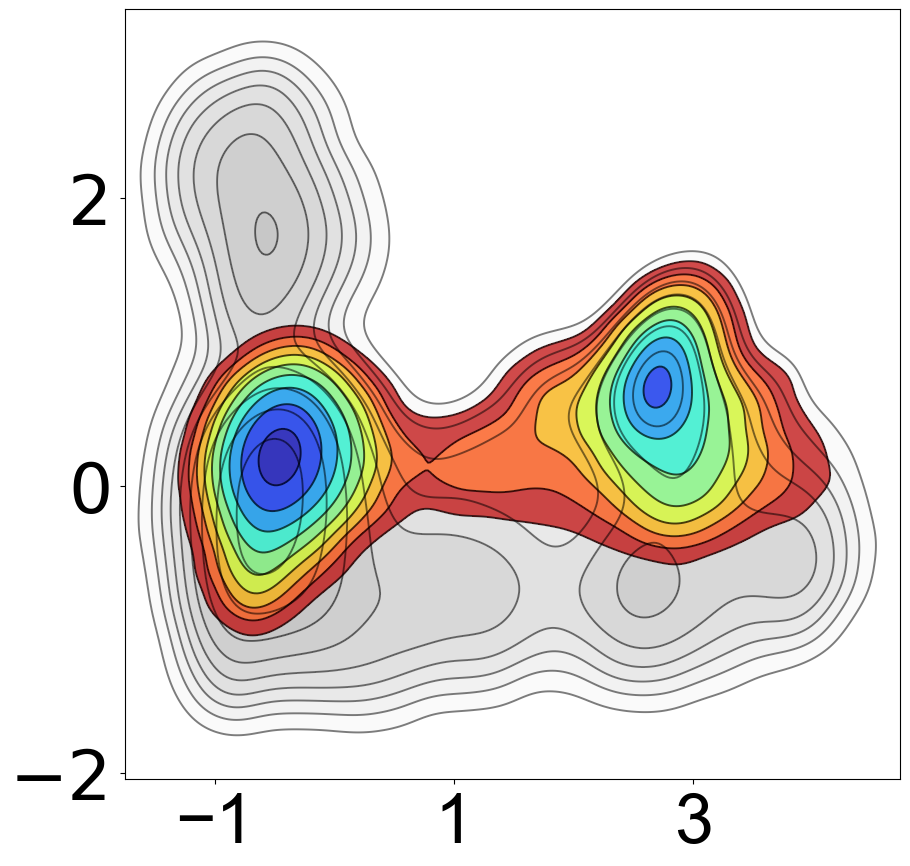

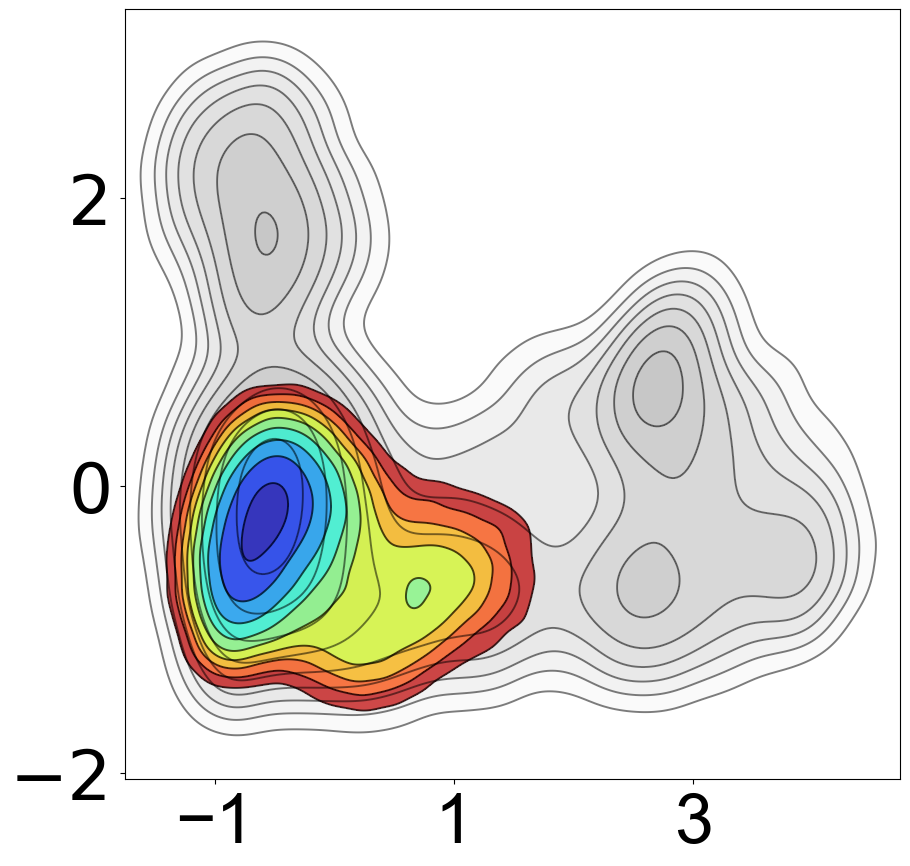

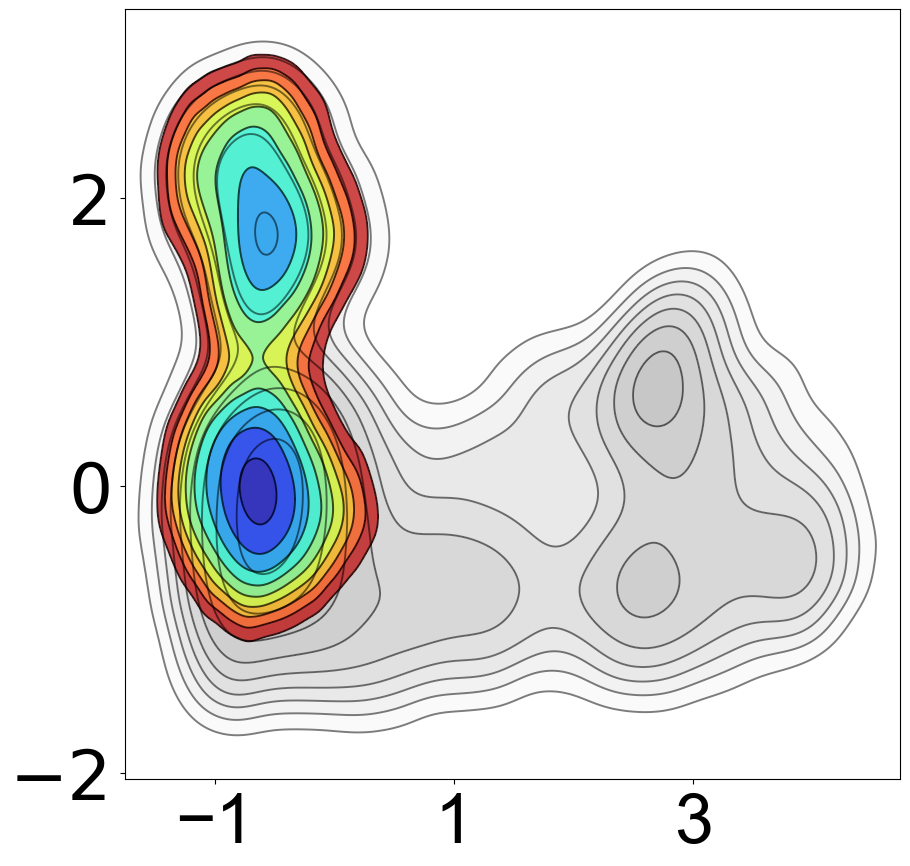

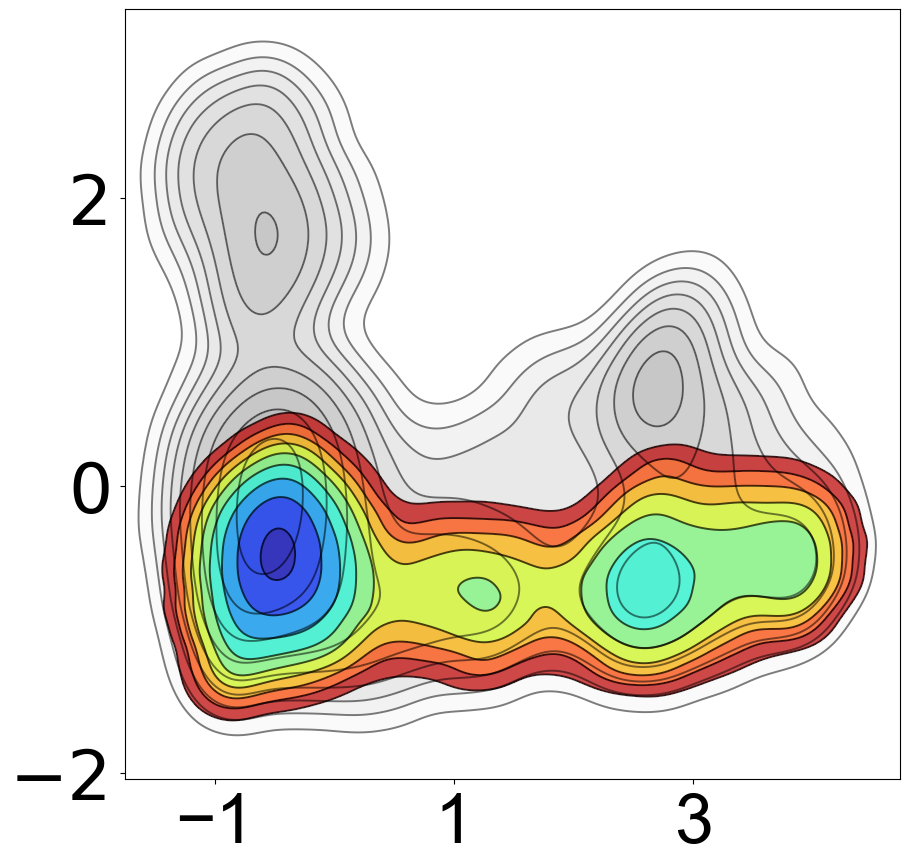

In [21]:
plot_Nice_PES(pca_Y,pca_HG3K50Q_apo,title='./Figures/HG3_D_APO_PCA',bins=300,sigma=7)
plot_Nice_PES(pca_Y,pca_HG3_S_apo,title='./Figures/HG3_S_APO_PCA',bins=300,sigma=7)
plot_Nice_PES(pca_Y,pca_HG3_C_apo,title='./Figures/HG3_C_APO_PCA',bins=300,sigma=7)
plot_Nice_PES(pca_Y,pca_HG3_E_apo,title='./Figures/HG3_E_APO_PCA',bins=300,sigma=7)



In [13]:
import matplotlib as mpl
import nglview as nv
import ipywidgets as widgets
import pytraj as pt
import warnings
import tqdm
warnings.filterwarnings("ignore")
%pylab inline
%matplotlib inline

def interactive_FEL2(pca_Y, trajfiles, topfile, output_plot=True, n_frames=100,output_structure=False, size=1, bins=90, sigma=0.99, pc1=0, pc2=1):
    '''
        
        Plot the Free Energy Surface(FES) of the given data in a matplotlib pyqt. User can select a point in the FES. 
        
                
        If you experience some problem or you have any comment with this function --> https://github.com/miqueleg/compbiolab :3
        
        Parameters: ---------------------------------------------------------------------------------
        
        data: 3D ndarray (MD,frames,tic_dim). If not, the calculations will be wrong!!
        
        trajfiles: 1D array containing all trajectories strings containing files path and name(order in the list is important)
        
        topfile: string containing file path and name for the .pdb file that will be used as topology.
        
        output_plot: If true, a plot including the FES and selected pint will be displayed at the end.
            default=True
            
        output_structure: If True,the selected structure is also returned as pytraj structure.
            default=False
            
        size: Float/Integer that defines the size of the plots
            default=1
            
        
        Returns: -------------------------------------------------------------------------------------------
        
        - nglview of the structure selected
        
        - If output_structure=True, the selected structure is also returned as pytraj structure
        
        Only in in jupyter-notebook
          
    '''
    ##This imports are kind of necessary in order to plot the graphic in the Tk canvas(PQt5).
    ## At the end of the function, the matplotlib inline canvas has to be setted again in order to do not disturbe next plots
    %matplotlib qt

    ##Plot the Free energy surface as Nice_PES function
    mpl.style.use("seaborn-paper")
    fig, ax = plt.subplots(figsize=(6*size,5*size))
    alldata=np.vstack(pca_Y)
    min1=np.min(alldata[:,pc1])
    max1=np.max(alldata[:,pc1])
    min2=np.min(alldata[:,pc2])
    max2=np.max(alldata[:,pc2])
    #print(all_data.shape)

    tickspacing1=1.0
    tickspacing2=1.0
    z,x,y = np.histogram2d(alldata[:,pc1], alldata[:,pc2], bins=bins)
    z += 0.1

    # compute free energies
    F = -np.log(z)

    # contour plot
    extent = [x[0], x[-1], y[0], y[-1]]

    plt.xticks(np.arange(int(min1), int(max1)+1, tickspacing1),fontsize=10*size)
    plt.yticks(np.arange(int(min2), int(max2)+1, tickspacing2),fontsize=10*size)
    #    sigma = 0.99 # this depends on how noisy your data is, play with it!
    data = gaussian_filter((F.T)*0.592-np.min(F.T)*0.592, sigma)
    levels=np.linspace(0,np.max(data)-0.5,num=8)
    ax.contour(data,colors='black',linestyles='solid',alpha=0.7,cmap=None, cbar=True, levels=levels,extent=extent)
    ax.contourf(data,alpha=0.5,cmap='jet', cbar=True,levels=levels,extent=extent)

    ##ginput will wait until a click is done into the plot and collect the coordinates into the x variable
    x = plt.ginput()


    #nodes are the prepared data corresponding of the points on the TICA scatter (tic0 and tic1 by default)
    nodes = np.array(list(zip(alldata[:,pc1],alldata[:,pc2])))
    node = np.array(x[0])
    #cdist finction computes the distance matrix between TICA nodes and node
    distances = np.array(cdist([node], nodes))
    #clicked frame is the position in the matrix distance in wich you can find the minimun value
    clicked_frames = np.argsort(distances)[0]
    clicked_frames = clicked_frames[:n_frames]
    MD_out = pt.Trajectory(top=topfile)
    
    for f in tqdm.tqdm(range(len(clicked_frames))):
        clicked_frame = clicked_frames[f]
        MD=pt.iterload(trajfiles, top=topfile)
        MD_out.append(MD[clicked_frame])

        #Frames is a list containing the len of all the MD's.
        #This forces the input TICA_test to have a 3D shape (MD,frames,tic_dim). If not, the calculations are wrong!!
        Frames = []
        for traj in pca_Y:
            Frames.append(len(traj))
        #In this loop is computed in wich MD and MD_frame you can find the clicked frame
        MD = 0
        Frame = clicked_frame
        for i in list(range(len(Frames))):
            sum_frames = sum([Frames[j] for j in list(range(len(Frames))) if j <= i])
            if clicked_frame <= sum_frames:
                MD = i
                Frame = clicked_frame - sum([Frames[j] for j in list(range(len(Frames))) if j < i])
                break
            else:
                continue
    #The selected_frame is displayed using pytraj and nglview
    MD=pt.iterload(trajfiles, top=topfile)
    view=nv.show_pytraj(MD)
    view.clear()
    view.add_cartoon(selection="protein")
    view.frame = int(clicked_frame)

    #returning to the matplotlib inline
    %matplotlib inline
    #plot the selected position with a scatter
    if output_plot:
        plt.figure(figsize=(6*size,5*size))
        plt.contour(data,colors='black',linestyles='solid',alpha=0.7,cmap=None, cbar=True, levels=levels,extent=extent)
        plt.contourf(data,alpha=0.2,cmap='jet', cbar=True,levels=levels,extent=extent)
        plt.scatter(np.array(x)[:,0],np.array(x)[:,1], c ='b', s =50)
    if output_structure:
        return view, MD_out
    else:
        return view


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.31it/s]


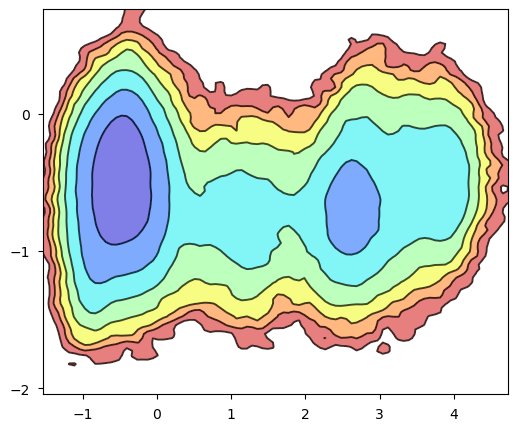

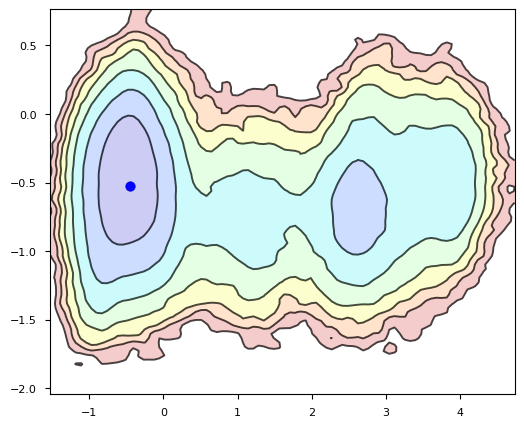

In [14]:
i = 3
view, frame = interactive_FEL2(pca_HG3_E_apo, trajfiles=trajfiles[i], topfile=topfiles[i], n_frames=1,pc1=0, pc2=1,output_structure=True)
selected = pt.Trajectory(top=topfiles[i])


In [15]:
selected.append(frame)
selected.save('/Volumes/Nia_HardDrive/PCA_Structs/HG/HG3_E_0.pdb', overwrite=True)

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.63it/s]


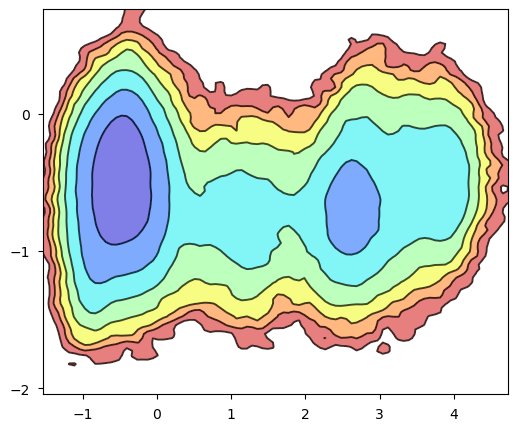

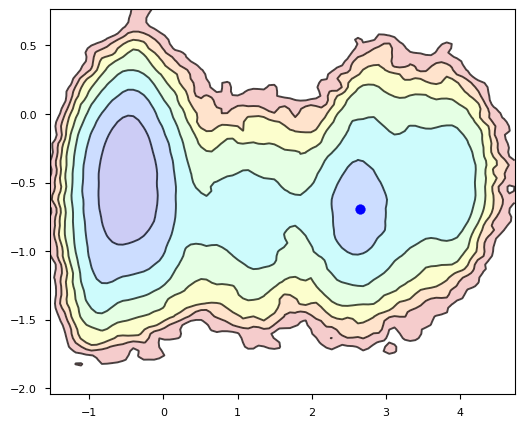

In [16]:
i = 3
view, frame = interactive_FEL2(pca_HG3_E_apo, trajfiles=trajfiles[i], topfile=topfiles[i], n_frames=1,pc1=0, pc2=1,output_structure=True)
selected = pt.Trajectory(top=topfiles[i])


In [17]:
selected.append(frame)
selected.save('/Volumes/Nia_HardDrive/PCA_Structs/HG/HG3_E_1.pdb', overwrite=True)

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.29it/s]


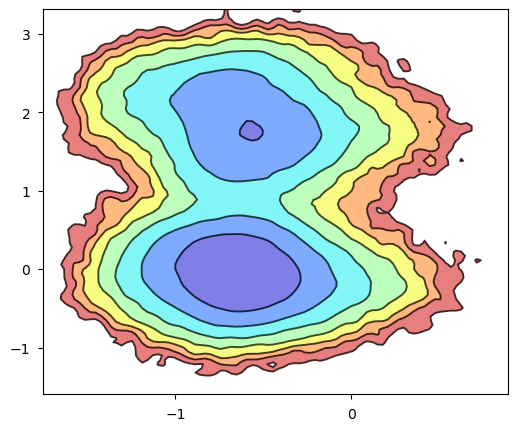

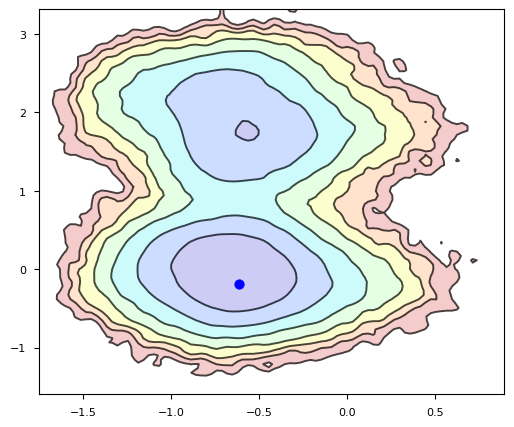

In [18]:
i = 2
view, frame = interactive_FEL2(pca_HG3_C_apo, trajfiles=trajfiles[i], topfile=topfiles[i], n_frames=1,pc1=0, pc2=1,output_structure=True)
selected = pt.Trajectory(top=topfiles[i])


In [19]:
selected.append(frame)
selected.save('/Volumes/Nia_HardDrive/PCA_Structs/HG/HG3_C_0.pdb', overwrite=True)

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.25it/s]


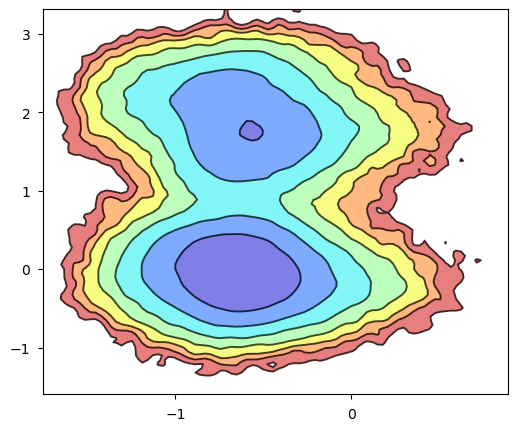

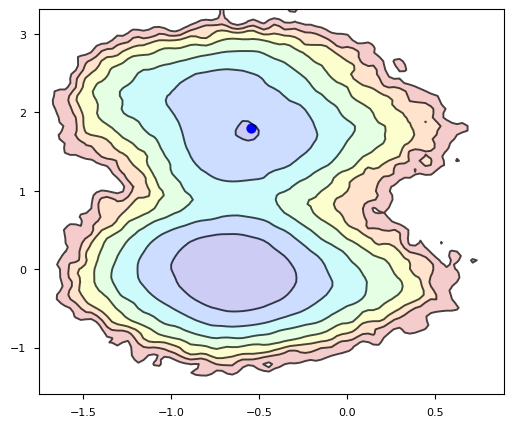

In [20]:
i = 2
view, frame = interactive_FEL2(pca_HG3_C_apo, trajfiles=trajfiles[i], topfile=topfiles[i], n_frames=1,pc1=0, pc2=1,output_structure=True)
selected = pt.Trajectory(top=topfiles[i])


In [21]:
selected.append(frame)
selected.save('/Volumes/Nia_HardDrive/PCA_Structs/HG/HG3_C_1.pdb', overwrite=True)